In [25]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as crs
from cartopy.util import add_cyclic_point

In [34]:
from ipyleaflet import Map, TileLayer, basemaps
from ipyleaflet.velocity import Velocity

In [26]:
# Downloaded from: https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_NRT_OBSERVATIONS_008_046/

In [5]:
ds = xr.open_dataset('data/tmp/dataset-duacs-nrt-global-merged-allsat-phy-l4_1678289248163.nc')

In [6]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 23, longitude: 28, time: 731)
Coordinates:
  * latitude   (latitude) float32 33.12 33.38 33.62 33.88 ... 38.12 38.38 38.62
  * time       (time) datetime64[ns] 2020-05-15 2020-05-16 ... 2022-05-15
  * longitude  (longitude) float32 -79.12 -78.88 -78.62 ... -72.88 -72.62 -72.38
Data variables:
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    crs        int32 ...
    err_vgosa  (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    flag_ice   (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
    err_ugosa  (time, latitude, longitude) float64 ...
    err_sla    (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2023-03-08T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2023-03-07T12:00:00Z
    title:                                          NRT merged all satellites...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [22]:
ds.isel(time=340)

<xarray.Dataset>
Dimensions:    (latitude: 23, longitude: 28)
Coordinates:
  * latitude   (latitude) float32 33.12 33.38 33.62 33.88 ... 38.12 38.38 38.62
    time       datetime64[ns] 2021-04-20
  * longitude  (longitude) float32 -79.12 -78.88 -78.62 ... -72.88 -72.62 -72.38
Data variables:
    ugos       (latitude, longitude) float64 ...
    vgos       (latitude, longitude) float64 ...
    vgosa      (latitude, longitude) float64 -0.0107 -0.0094 ... 0.0007 0.045
    crs        int32 -2147483647
    err_vgosa  (latitude, longitude) float64 ...
    sla        (latitude, longitude) float64 ...
    ugosa      (latitude, longitude) float64 -0.0177 -0.0199 ... -0.0807 -0.0743
    flag_ice   (latitude, longitude) float64 ...
    adt        (latitude, longitude) float64 ...
    err_ugosa  (latitude, longitude) float64 ...
    err_sla    (latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2023-03-08T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2023-03-07T12:00:00Z
    title:                                          NRT merged all satellites...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

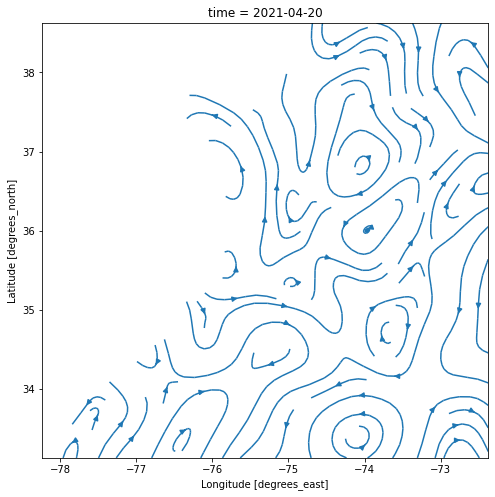

In [33]:
ds = xr.open_dataset('data/tmp/dataset-duacs-nrt-global-merged-allsat-phy-l4_1678289248163.nc')
fig,ax = plt.subplots(figsize=(8,8))#,subplot_kw=dict(projection=crs.PlateCarree()))
ds.isel(time=340).plot.streamplot(x='longitude',y='latitude', u='ugosa',v='vgosa',ax=ax,levels=10)
plt.show()

In [37]:
center = [35, -50]
zoom = 4
m = Map(center=center, zoom=zoom, interpolation='nearest', basemap=basemaps.Gaode.Satellite)

display_options = {
    'velocityType': 'Global Wind',
    'displayPosition': 'bottomleft',
    'displayEmptyString': 'No wind data'
}

wind = Velocity(
    data=ds.isel(time=340),
    zonal_speed='ugosa', meridional_speed='vgosa',
    latitude_dimension='latitude', longitude_dimension='longitude',
    velocity_scale=0.2, max_velocity=.5,
    display_options=display_options
)

m.add_layer(wind)

m

Map(center=[35, -50], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…